## **COVID-19 X-Ray Classification: Data Exploration**
- **This notebook explores the COVID-19 Radiography Database to understand its structure,**
- **visualize sample images, and analyze class distribution.**

## **Objectives**
- **Load and inspect the dataset.**
- **Visualize sample images from each class.**
- **Plot class distribution to check for imbalance.**
- **Save results for documentation.**

## **Import Libraries**

In [ ]:
import kagglehub
import os
import shutil
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# **Download Dataset**
- Uses kagglehub.dataset_download to fetch the COVID-19 Radiography Database from Kaggle.
- Checks if the downloaded dataset is a zip file by verifying if path ends with .zip.
- If it’s a zip file, extracts it to target_folder using zipfile.ZipFile.
- If it’s not a zip file, copies the dataset files to target_folder using shutil.copytree with dirs_exist_ok=True to overwrite existing directories.
- Prints the destination path to confirm successful extraction or copying.

In [ ]:
# # Define the target folder where you want to store the dataset
# target_folder = os.path.join("..", "data")

# # Ensure the target folder exists
# os.makedirs(target_folder, exist_ok=True)

# # Download the latest version of the dataset
# path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")

# print("Path to dataset files:", path)

# # Check if the downloaded path is a zip file
# if path.endswith(".zip"):
#     # Extract the zip file to the target folder
#     with zipfile.ZipFile(path, 'r') as zip_ref:
#         zip_ref.extractall(target_folder)
#     print(f"Dataset extracted to: {target_folder}")
# else:
#     # If not a zip, copy the folder/files to the target folder
#     shutil.copytree(path, target_folder, dirs_exist_ok=True)
#     print(f"Dataset copied to: {target_folder}")

## **Define Paths and Identify Classes**

- Sets DATASET_DIR to the extracted dataset directory (dataset/COVID-19_Radiography_Dataset/).
- Sets TARGET_DIR to a new directory (dataset/COVID_Dataset/) for organized image storage.
- Initializes an empty CLASSES list to store class names (e.g., COVID, Normal, Viral Pneumonia, Lung Opacity).
- Iterates through DATASET_DIR to identify subdirectories (classes), appending each to CLASSES.
- Prints each class name for verification and returns the CLASSES list.

In [ ]:
DATASET_DIR = os.path.join("..", "data", "COVID-19_Radiography_Dataset")
TARGET_DIR = os.path.join("..", "data", "COVID_Dataset")

In [ ]:
CLASSES = []
for item in os.listdir(DATASET_DIR):
    item_path = os.path.join(DATASET_DIR, item)
    if os.path.isdir(item_path):
        print(item)
        CLASSES.append(item)

COVID
Viral Pneumonia
Lung_Opacity
Normal


In [ ]:
CLASSES

['COVID', 'Viral Pneumonia', 'Lung_Opacity', 'Normal']

## **Define Function to Organize Images**
- Defines create_image_dataset to organize images from the dataset into a simplified structure.
- Removes target_dir if it exists using shutil.rmtree to ensure a clean slate.
- Creates target_dir using os.makedirs.
- For each class in classes, creates a corresponding subdirectory in target_dir.
- Copies images from the source (source_dir/clas/images/) to the target (target_dir/clas/) using shutil.copy.
- Assumes the dataset has an images subdirectory for each class, as per the Kaggle dataset structure.

In [ ]:
def create_image_dataset(source_dir, target_dir, classes):

  if os.path.exists(TARGET_DIR):
    shutil.rmtree(TARGET_DIR)
  os.makedirs(target_dir, exist_ok=True)

  for clas in classes:
    src_folder = os.path.join(source_dir, clas, "images")
    dst_folder = os.path.join(target_dir, clas)

    os.makedirs(dst_folder, exist_ok=True)

    for img in os.listdir(src_folder):
      src_path = os.path.join(src_folder, img)
      dst_path = os.path.join(dst_folder, img)
      shutil.copy(src_path, dst_path)

- Execute Image Organization

In [ ]:
create_image_dataset(DATASET_DIR, TARGET_DIR, CLASSES)

- Count Images per Class

In [ ]:
class_count = {cls: len(os.listdir(os.path.join(TARGET_DIR, cls))) for cls in CLASSES}
df_counts = pd.DataFrame.from_dict(class_count, orient='index', columns=['Count'])

In [ ]:
print("Class Distribution:")
df_counts

Class Distribution:


,Count
COVID,3616
Viral Pneumonia,1345
Lung_Opacity,6012
Normal,10192


## **Visualize Class Distribution**

/tmp/ipykernel_12788/1132777044.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class", loc="upper right", frameon=False, labelcolor="white")


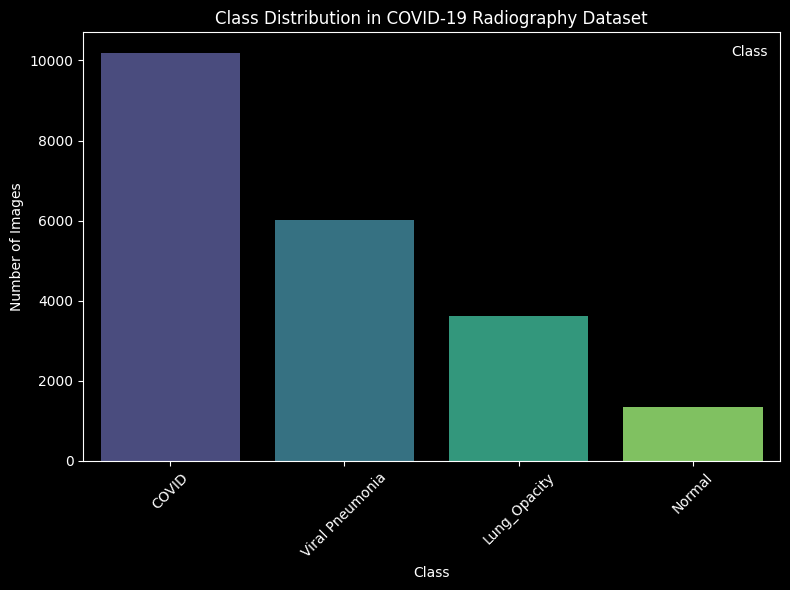

In [ ]:
plt.style.use("dark_background")

# Create the figure
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(
    x=df_counts.index,
    y=df_counts["Count"].sort_values(ascending=False),
    hue=df_counts.index,
    palette="viridis",  # Optional: a color palette that looks good in dark theme
)

# Customize plot
plt.title("Class Distribution in COVID-19 Radiography Dataset", color="white")
plt.xlabel("Class", color="white")
plt.ylabel("Number of Images", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")

# Adjust legend (optional, since hue is used)
plt.legend(title="Class", loc="upper right", frameon=False, labelcolor="white")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## **Visualize Sample Images**

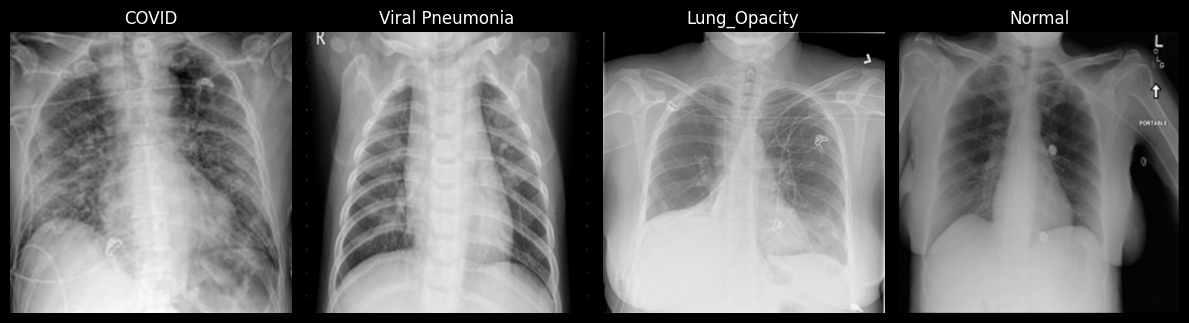

In [ ]:
plt.figure(figsize=(12, 8))
for i, cls in enumerate(CLASSES):
    # Get the first image in the class directory
    img_path = os.path.join(TARGET_DIR, cls, os.listdir(os.path.join(TARGET_DIR, cls))[0])
    img = Image.open(img_path)
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(cls)
    plt.axis("off")
plt.tight_layout()
plt.show()